In [159]:
import pandas as pd
import matplotlib.pyplot as plt


Desafio02: Descobrir de quais estados são os inscritos com 13 anos. 
Desafio01: Proporção dos inscritos por idade.
Desafio02: Descobrir de quais estados são os inscritos com 13 anos.
Desafio03: Adicionar título no gráfico.
Desafio04: Plotar os Histogramas das idades do treineiro e não dos treineiros.
Desafio05: Comparar as distribuições das provas em inglês espanhol.
Desafio06: Explorar a documentação do matplotlib.

In [160]:
font = "https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv"
data = pd.read_csv(font)

In [161]:
data.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,A,B,A,A,D,A,A,B


# Desafio02: Descobrir de quais estados são os inscritos com 13 anos. 


In [162]:
#grouping all enrolled into age groups.
data2 = data.groupby(["NU_IDADE"]).NU_INSCRICAO.count().reset_index()
data2

,NU_IDADE,NU_INSCRICAO
0,13,4
1,14,141
2,15,2009
3,16,7830
4,17,21256
...,...,...
60,73,2
61,75,2
62,76,1
63,77,1


In [163]:
#returns the state from all participants with 13 years old.
data2 = data.query("NU_IDADE == 13")[["NU_INSCRICAO", "SG_UF_RESIDENCIA", "NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]].reset_index()
data2


,index,NU_INSCRICAO,SG_UF_RESIDENCIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
0,57359,190003297248,SP,566.0,547.3,533.3,425.2,920.0
1,95630,190004825557,MT,NaN,NaN,NaN,NaN,NaN
2,98197,190004926952,AP,NaN,NaN,NaN,NaN,NaN
3,116501,190005659236,BA,535.6,477.3,703.5,554.4,500.0


In [164]:
#sum the values per line to average

media = data2.iloc[:,3:].sum(axis =1) / 5
data2["media"] = media
data2

,index,NU_INSCRICAO,SG_UF_RESIDENCIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,media
0,57359,190003297248,SP,566.0,547.3,533.3,425.2,920.0,598.36
1,95630,190004825557,MT,NaN,NaN,NaN,NaN,NaN,0.00
2,98197,190004926952,AP,NaN,NaN,NaN,NaN,NaN,0.00
3,116501,190005659236,BA,535.6,477.3,703.5,554.4,500.0,554.16


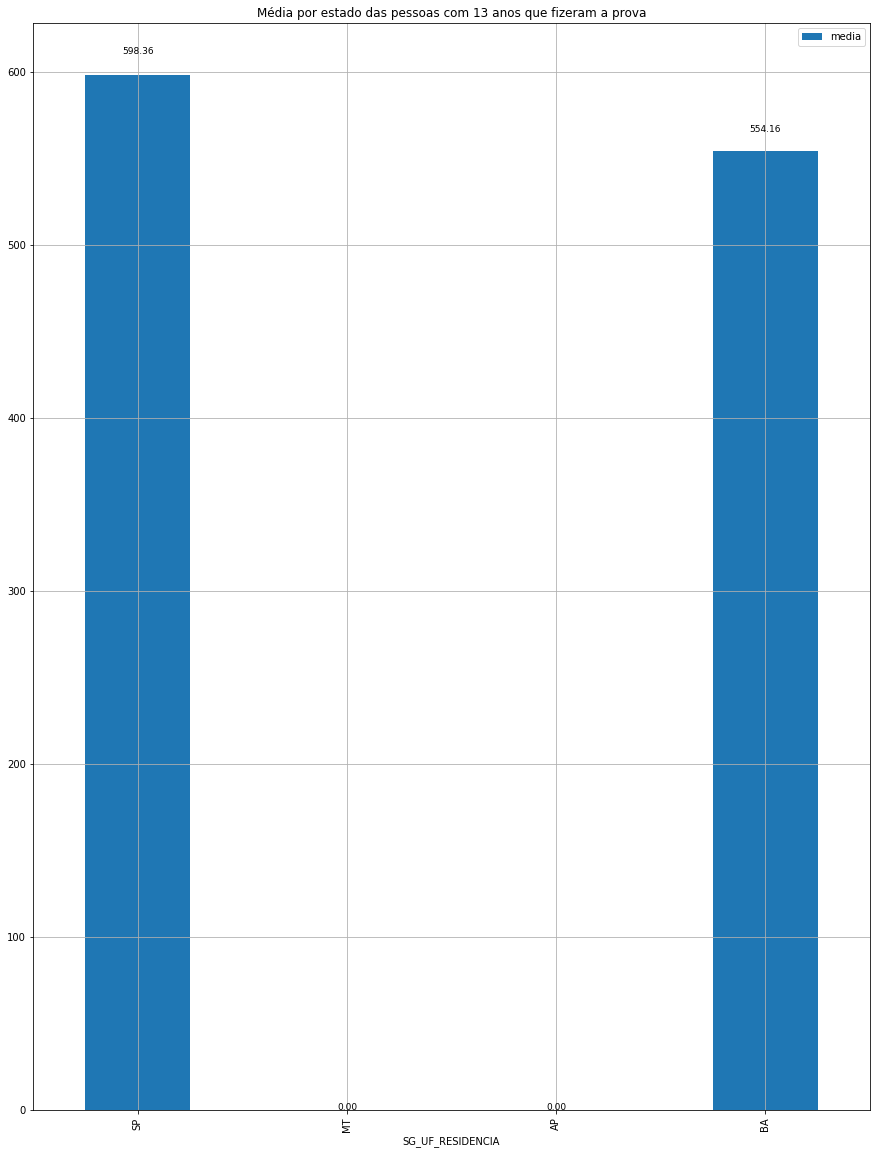

In [174]:
#box ploting
ax = data2.plot.bar(x = "SG_UF_RESIDENCIA",y = "media", grid = True, figsize = (15,20))
plt.title("Média por estado das pessoas com 13 anos que fizeram a prova")
# Add the annotations
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2f}'.format(height), (x + width/2, y + height*1.02), ha='center', fontsize= 9)